# Merging Joining & Concatenation

In [2]:
import numpy as np
import pandas as pd

In [3]:
courses=pd.read_csv('courses.csv')
students=pd.read_csv('students.csv')
reg2=pd.read_csv('reg-month2.csv')
reg1=pd.read_csv('reg-month1.csv')
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [5]:
pd.concat([reg1, reg2], ignore_index=True).head()

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9


In [13]:
multi=pd.concat([reg1,reg2],keys=['month1','month2']).sample(5)
multi.loc['month1'].head()

,student_id,course_id
7,7,8
13,11,7
3,23,4


In [14]:
pd.concat([reg1, reg2],axis=1).head()

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9


## JOIN

In [15]:
#inner join
students.merge(reg1,how='inner',on='student_id').head()

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,3,Parveen Bhalla,3,3
3,7,Tarun Thaker,9,8
4,7,Tarun Thaker,9,10


In [19]:
#left join
courses.merge(reg1,how='left',on='course_id').sample(5)

,course_id,course_name,price,student_id
26,12,C++,1299,NaN
17,6,power bi,1899,1.0
10,3,data analysis,4999,3.0
1,1,python,2499,18.0
18,6,power bi,1899,23.0


In [20]:
#right join
temp=pd.DataFrame({
    'student_id':[26,27,28],
    'name':['rahul','sachin','sourav'],
    'partner_id':[1,2,3]
})
students=pd.concat([students,temp],ignore_index=True)

In [ ]:
students.merge(reg1,how='right',on='student_id').sample(5)

,student_id,name,partner,partner_id,course_id
0,23,Chhavi Lachman,18.0,NaN,1
17,16,Elias Dodiya,25.0,NaN,5
4,16,Elias Dodiya,25.0,NaN,9
18,23,Chhavi Lachman,18.0,NaN,3
11,1,Kailash Harjo,23.0,NaN,6


In [23]:
students.merge(reg1,how='outer',on='student_id').tail(5)

,student_id,name,partner,partner_id,course_id
33,25,Shashank D’Alia,2.0,NaN,1.0
34,25,Shashank D’Alia,2.0,NaN,10.0
35,26,rahul,NaN,1.0,NaN
36,27,sachin,NaN,2.0,NaN
37,28,sourav,NaN,3.0,NaN


In [25]:
#find total revenue generated by the company
regs=pd.concat([reg1,reg2],ignore_index=True)
regs.merge(courses,how='inner',on='course_id')['price'].sum()

np.int64(154247)

In [27]:
#find monthly revenue generated by the company
temp=pd.concat([reg1, reg2], keys=['month1', 'month2']).reset_index()
temp.merge(courses, how='inner', on='course_id').groupby('level_0')['price'].sum()

level_0
month1    89175
month2    65072
Name: price, dtype: int64

In [29]:
#print the registration table
regs.merge(students, how='inner', on='student_id').merge(courses, how='inner', on='course_id')[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,tableau,2499
2,Fardeen Mahabir,power bi,1899
3,Chhavi Lachman,machine learning,9999
4,Elias Dodiya,plotly,699
5,Fardeen Mahabir,python,2499
6,Kailash Harjo,python,2499
7,Tarun Thaker,pandas,1099
8,Yash Sethi,data analysis,4999
9,Preet Sha,python,2499


<Axes: xlabel='course_name'>

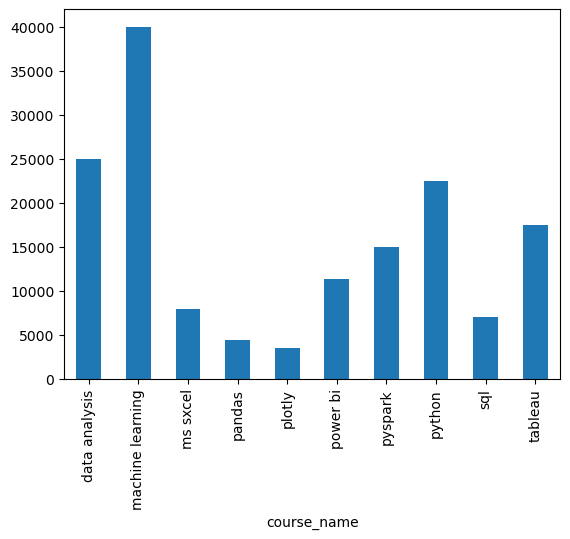

In [30]:
#plot the bar chart for revenue generated by each course
regs.merge(courses, how='inner', on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

In [32]:
#find students who enrolled in both the months
common=np.intersect1d(reg1['student_id'], reg2['student_id'])
students[students['student_id'].isin(common)]

,student_id,name,partner,partner_id
0,1,Kailash Harjo,23.0,NaN
2,3,Parveen Bhalla,3.0,NaN
6,7,Tarun Thaker,9.0,NaN
10,11,David Mukhopadhyay,20.0,NaN
15,16,Elias Dodiya,25.0,NaN
16,17,Yasmin Palan,7.0,NaN
17,18,Fardeen Mahabir,13.0,NaN
21,22,Yash Sethi,21.0,NaN
22,23,Chhavi Lachman,18.0,NaN


In [33]:
#find courses which were not enrolled by any student
courses[~courses['course_id'].isin(regs['course_id'])]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [35]:
#find students who have not registered for any course
students[~students['student_id'].isin(regs['student_id'])]

,student_id,name,partner,partner_id
3,4,Marlo Dugal,14.0,NaN
4,5,Kusum Bahri,6.0,NaN
5,6,Lakshmi Contractor,10.0,NaN
7,8,Radheshyam Dey,5.0,NaN
8,9,Nitika Chatterjee,4.0,NaN
9,10,Aayushman Sant,8.0,NaN
19,20,Hanuman Hegde,11.0,NaN
25,26,rahul,NaN,1.0
26,27,sachin,NaN,2.0
27,28,sourav,NaN,3.0


In [42]:
#print the student -> partner mapping using self join
students.merge(students, how='inner', left_on='partner_id', right_on='student_id')[['name_x', 'name_y']]

,name_x,name_y
0,rahul,Kailash Harjo
1,sachin,Esha Butala
2,sourav,Parveen Bhalla


In [44]:
#find top 3 students who enrolled in the most number of courses
top_students = regs.groupby('student_id').size().reset_index(name='course_count')
top_students = top_students.sort_values(by='course_count', ascending=False).head(3)
top_students = top_students.merge(students, on='student_id')[['name', 'course_count']]
top_students

,name,course_count
0,Chhavi Lachman,6
1,Tarun Thaker,5
2,Kailash Harjo,4


In [48]:
#find top 3 students who spent the most money on courses
top_spenders = regs.merge(courses, on='course_id').groupby('student_id')['price'].sum().nlargest(3).reset_index(name='total_spent').merge(students, on='student_id')[['name', 'total_spent']]
top_spenders

,name,total_spent
0,Chhavi Lachman,22594
1,Pranab Natarajan,15096
2,Qabeel Raman,13498


In [68]:
temp_df = deliveries.merge(matches,left_on='match_id',right_on='id')
six_df = temp_df[temp_df['batsman_runs'] == 6]
num_sixes = six_df.groupby('venue')['venue'].count()
num_matches = matches['venue'].value_counts()
(num_sixes/num_matches).sort_values(ascending=False).head(3)

venue
Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
dtype: float64